### Time-Series Forecasting Of Covid-19 Cases In South Africa (GRU)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('South Africa.csv')

In [3]:
df.head()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
0,05-03-2020,1,1,0,0
1,06-03-2020,1,0,0,0
2,07-03-2020,2,1,0,0
3,08-03-2020,3,1,0,0
4,09-03-2020,7,4,0,0


In [4]:
df.tail()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
154,06-08-2020,538184,8307,9604,306
155,07-08-2020,545476,7292,9909,305
156,08-08-2020,553188,7712,10210,301
157,09-08-2020,559858,6670,10408,198
158,10-08-2020,563598,3740,10621,213


In [6]:
df1=df.reset_index()['Total']

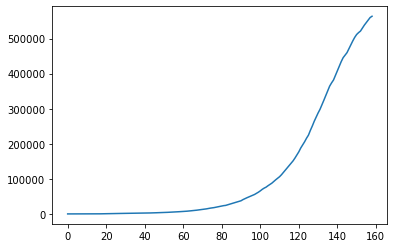

In [7]:
plt.plot(df1)

In [8]:
df1

0           1
1           1
2           2
3           3
4           7
        ...  
154    538184
155    545476
156    553188
157    559858
158    563598
Name: Total, Length: 159, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [1.77431746e-06]
 [3.54863493e-06]
 [1.06459048e-05]
 [1.06459048e-05]
 [2.12918096e-05]
 [2.83890794e-05]
 [4.08093017e-05]
 [4.08093017e-05]
 [8.87158732e-05]
 [1.08233365e-04]
 [1.49042667e-04]
 [2.04046508e-04]
 [2.64373302e-04]
 [3.61960763e-04]
 [4.24061874e-04]
 [4.84388668e-04]
 [7.11501303e-04]
 [9.86520510e-04]
 [1.25621676e-03]
 [1.64301797e-03]
 [2.07417712e-03]
 [2.10434051e-03]
 [2.26935204e-03]
 [2.35097064e-03]
 [2.39887721e-03]
 [2.44678378e-03]
 [2.59227782e-03]
 [2.66857347e-03]
 [2.81051886e-03]
 [2.93472109e-03]
 [2.98972493e-03]
 [3.10150693e-03]
 [3.27184140e-03]
 [3.42975566e-03]
 [3.55218356e-03]
 [3.59654150e-03]
 [3.85381753e-03]
 [4.02947496e-03]
 [4.28320236e-03]
 [4.44466525e-03]
 [4.62032268e-03]
 [4.93615119e-03]
 [5.38150487e-03]
 [5.60152024e-03]
 [5.85347332e-03]
 [6.14623570e-03]
 [6.44786967e-03]
 [7.01210262e-03]
 [7.48584538e-03]
 [7.73602414e-03]
 [8.06427288e-03]
 [8.50252929e-03]
 [8.86271573e-03]
 [9.490824

In [11]:
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(95, 64)

In [13]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.77431746e-06],
       [3.54863493e-06],
       [1.06459048e-05],
       [1.06459048e-05],
       [2.12918096e-05],
       [2.83890794e-05],
       [4.08093017e-05],
       [4.08093017e-05],
       [8.87158732e-05],
       [1.08233365e-04],
       [1.49042667e-04],
       [2.04046508e-04],
       [2.64373302e-04],
       [3.61960763e-04],
       [4.24061874e-04],
       [4.84388668e-04],
       [7.11501303e-04],
       [9.86520510e-04],
       [1.25621676e-03],
       [1.64301797e-03],
       [2.07417712e-03],
       [2.10434051e-03],
       [2.26935204e-03],
       [2.35097064e-03],
       [2.39887721e-03],
       [2.44678378e-03],
       [2.59227782e-03],
       [2.66857347e-03],
       [2.81051886e-03],
       [2.93472109e-03],
       [2.98972493e-03],
       [3.10150693e-03],
       [3.27184140e-03],
       [3.42975566e-03],
       [3.55218356e-03],
       [3.59654150e-03],
       [3.85381753e-03],
       [4.02947496e-03],


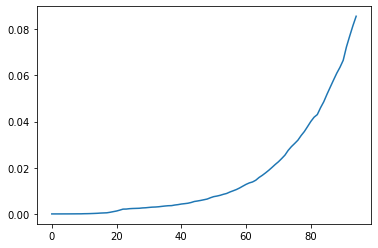

In [14]:
plt.plot(train_data)

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(44, 50)
(44,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(13, 50)
(13,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization


In [24]:
model=Sequential()
model.add(GRU(128,input_shape=(50, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=1,verbose=1)

Epoch 1/300
44/44 [==============================] - 0s 8ms/step - loss: 1.5014e-06 - val_loss: 0.0029
Epoch 2/300
44/44 [==============================] - 0s 7ms/step - loss: 1.2738e-06 - val_loss: 0.0034
Epoch 3/300
44/44 [==============================] - 0s 7ms/step - loss: 6.4101e-07 - val_loss: 0.0056
Epoch 4/300
44/44 [==============================] - 0s 7ms/step - loss: 1.8908e-06 - val_loss: 0.0044
Epoch 5/300
44/44 [==============================] - 0s 6ms/step - loss: 9.7090e-07 - val_loss: 0.0034
Epoch 6/300
44/44 [==============================] - 0s 7ms/step - loss: 1.4168e-06 - val_loss: 0.0109
Epoch 7/300
44/44 [==============================] - 0s 6ms/step - loss: 1.2659e-06 - val_loss: 0.0040
Epoch 8/300
44/44 [==============================] - 0s 7ms/step - loss: 9.3181e-07 - val_loss: 0.0040
Epoch 9/300
44/44 [==============================] - 0s 7ms/step - loss: 2.2351e-06 - val_loss: 0.0013
Epoch 10/300
44/44 [==============================] - 0s 6ms/step - loss:

Epoch 80/300
44/44 [==============================] - 0s 7ms/step - loss: 6.0211e-07 - val_loss: 0.0054
Epoch 81/300
44/44 [==============================] - 0s 7ms/step - loss: 1.5522e-06 - val_loss: 0.0050
Epoch 82/300
44/44 [==============================] - 0s 9ms/step - loss: 4.3830e-07 - val_loss: 0.0059
Epoch 83/300
44/44 [==============================] - 0s 8ms/step - loss: 6.5487e-07 - val_loss: 0.0040
Epoch 84/300
44/44 [==============================] - 0s 8ms/step - loss: 2.8810e-06 - val_loss: 0.0054
Epoch 85/300
44/44 [==============================] - 0s 8ms/step - loss: 7.2942e-07 - val_loss: 0.0069
Epoch 86/300
44/44 [==============================] - 0s 8ms/step - loss: 7.0661e-07 - val_loss: 0.0049
Epoch 87/300
44/44 [==============================] - 0s 9ms/step - loss: 8.6580e-07 - val_loss: 0.0073
Epoch 88/300
44/44 [==============================] - 0s 11ms/step - loss: 8.1204e-07 - val_loss: 0.0068
Epoch 89/300
44/44 [==============================] - 0s 9ms/st

44/44 [==============================] - 0s 6ms/step - loss: 7.3347e-07 - val_loss: 0.0105
Epoch 159/300
44/44 [==============================] - 0s 6ms/step - loss: 1.4304e-06 - val_loss: 0.0078
Epoch 160/300
44/44 [==============================] - 0s 6ms/step - loss: 7.2756e-07 - val_loss: 0.0098
Epoch 161/300
44/44 [==============================] - 0s 7ms/step - loss: 6.0382e-07 - val_loss: 0.0099
Epoch 162/300
44/44 [==============================] - 0s 7ms/step - loss: 5.4139e-07 - val_loss: 0.0107
Epoch 163/300
44/44 [==============================] - 0s 7ms/step - loss: 1.1576e-06 - val_loss: 0.0087
Epoch 164/300
44/44 [==============================] - 0s 7ms/step - loss: 9.1492e-07 - val_loss: 0.0111
Epoch 165/300
44/44 [==============================] - 0s 7ms/step - loss: 8.3263e-07 - val_loss: 0.0097
Epoch 166/300
44/44 [==============================] - 0s 7ms/step - loss: 1.5847e-06 - val_loss: 0.0065
Epoch 167/300
44/44 [==============================] - 0s 7ms/step - 

44/44 [==============================] - 0s 7ms/step - loss: 6.6921e-07 - val_loss: 0.0058
Epoch 237/300
44/44 [==============================] - 0s 7ms/step - loss: 9.9421e-07 - val_loss: 0.0087
Epoch 238/300
44/44 [==============================] - 0s 7ms/step - loss: 2.0077e-06 - val_loss: 0.0212
Epoch 239/300
44/44 [==============================] - 0s 6ms/step - loss: 7.6248e-06 - val_loss: 0.0045
Epoch 240/300
44/44 [==============================] - 0s 7ms/step - loss: 1.1543e-06 - val_loss: 0.0085
Epoch 241/300
44/44 [==============================] - 0s 7ms/step - loss: 5.7940e-07 - val_loss: 0.0101
Epoch 242/300
44/44 [==============================] - 0s 7ms/step - loss: 7.7214e-07 - val_loss: 0.0148
Epoch 243/300
44/44 [==============================] - 0s 8ms/step - loss: 8.0357e-07 - val_loss: 0.0139
Epoch 244/300
44/44 [==============================] - 0s 8ms/step - loss: 1.3401e-06 - val_loss: 0.0148
Epoch 245/300
44/44 [==============================] - 0s 7ms/step - 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [ ]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

Validation RMSE

In [ ]:

math.sqrt(mean_squared_error(ytest,test_predict))

Training MEA

In [ ]:
mean_absolute_error(y_train,train_predict)

Validation MEA

In [ ]:
mean_absolute_error(ytest,test_predict)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=55
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[19:].reshape(1,-1)
x_input.shape


In [ ]:
x_input

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
from numpy import array

lst_output=[]
n_steps=55
i=0
while(i<180):
    
    if(len(temp_input)>55):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,56)
day_pred=np.arange(56,236)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[130:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[135:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)
plt.ylabel("Confirmed Covid Cases")
plt.xlabel("Days")
